# Clustering Algorithms

## Assignment Overview

### About the data:
The Economist Democracy Index is an annual index compiled by the UK-based magazine, The Economist,   
through its Economist Intelligence Unit (EIU). This index rates the state of democracy across countries worldwide.    
  
It is based on five categories:

- **Electoral Process and Pluralism:**   
This measures the fairness of elections, the freedom to form political parties, and the participation of various groups in the political process.  

- **Functioning of Government:** This evaluates how effectively governments operate, the quality of governance, the level of corruption, and whether political decisions are made in a transparent manner. 

- **Political Participation:** This assesses the level of public involvement in politics, including voter turnout, membership in political parties, and engagement with political issues. 
 
- **Political Culture:** This looks at the societal norms and attitudes towards politics, including the extent to which different viewpoints are tolerated and the relationship between government and religion. 

- **Civil Liberties:** This gauges the extent of individual freedoms, including freedom of speech, freedom of the press, and the right to protest. 


**Countries are classified into four types of regimes based on their scores:**
 
- Full democracies 
- Flawed democracies 
- Hybrid regimes 
- Authoritarian regimes 

The Democracy Index is widely referenced in political and academic circles as a comprehensive measure of the state of democracy globally.   
It provides a snapshot of the health of democracy in each country and also allows for comparisons across countries and over time. 

[Additional information on Democracy Index ](https://en.wikipedia.org/wiki/The_Economist_Democracy_Index)

### **Task 1:** Load the democracy index data set 

In [9]:
##Importing libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Reading in the .csv file
df = pd.read_csv("democracy_index.csv")

##Head of dataset
df.head()




,Unnamed: 0,rank,country,democracy_index,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties,category
0,0,1,Norway,9.87,10.00,9.64,10.00,10.00,9.71,Full democracy
1,1,2,Iceland,9.58,10.00,9.29,8.89,10.00,9.71,Full democracy
2,2,3,Sweden,9.39,9.58,9.64,8.33,10.00,9.41,Full democracy
3,3,4,New Zealand,9.26,10.00,9.29,8.89,8.13,10.00,Full democracy
4,4,5,Denmark,9.22,10.00,9.29,8.33,9.38,9.12,Full democracy


In [3]:
##Dataset summary

df.describe()

,Unnamed: 0,democracy_index,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties
count,167.00000,167.000000,167.000000,167.000000,167.00000,167.000000,167.000000
mean,83.00000,5.478563,5.902934,4.884671,5.24976,5.593952,5.768263
std,48.35287,2.199400,3.540180,2.522545,1.87654,1.647974,2.676157
min,0.00000,1.080000,0.000000,0.000000,1.11000,1.250000,0.000000
25%,41.50000,3.545000,3.000000,2.860000,3.89000,4.380000,3.530000
50%,83.00000,5.690000,6.580000,5.000000,5.56000,5.630000,5.880000
75%,124.50000,7.175000,9.170000,6.790000,6.67000,6.250000,8.240000
max,166.00000,9.870000,10.000000,9.640000,10.00000,10.000000,10.000000


### **Task 2:**  Use the five categories to cluster countries into different regimes 

In [4]:
## YOUR CODE HERE
##Frequency of regime count
regime_count = pd.crosstab(index=df["category"], columns="count")
regime_count
#regime_count.sum()

col_0,count
category,
Authoritarian,53
Flawed democracy,55
Full democracy,20
Hybrid regime,39


In [14]:
categories = df.iloc[:, [3, 4, 5, 6, 7]].values
categories #The 5 categories that will be used to cluster in task 4 and 5

array([[ 9.87, 10.  ,  9.64, 10.  , 10.  ],
       [ 9.58, 10.  ,  9.29,  8.89, 10.  ],
       [ 9.39,  9.58,  9.64,  8.33, 10.  ],
       [ 9.26, 10.  ,  9.29,  8.89,  8.13],
       [ 9.22, 10.  ,  9.29,  8.33,  9.38],
       [ 9.15,  9.58,  7.86,  8.33, 10.  ],
       [ 9.15,  9.58,  9.64,  7.78,  8.75],
       [ 9.14, 10.  ,  8.93,  8.33,  8.75],
       [ 9.09, 10.  ,  8.93,  7.78,  8.75],
       [ 9.03,  9.58,  9.29,  7.78,  9.38],
       [ 8.89,  9.58,  9.29,  8.33,  8.13],
       [ 8.81, 10.  ,  8.93,  6.67,  8.75],
       [ 8.68,  9.58,  8.57,  8.33,  7.5 ],
       [ 8.53,  9.58,  7.5 ,  8.33,  8.13],
       [ 8.38, 10.  ,  8.57,  6.11,  7.5 ],
       [ 8.29,  9.58,  7.86,  8.33,  6.88],
       [ 8.22,  9.17,  8.21,  5.56,  8.75],
       [ 8.21,  9.17,  8.21,  6.11,  8.75],
       [ 8.08,  9.17,  7.14,  7.78,  7.5 ],
       [ 8.07,  9.58,  7.5 ,  6.67,  7.5 ],
       [ 8.  ,  9.17,  7.86,  7.22,  7.5 ],
       [ 7.99,  8.75,  8.21,  6.67,  7.5 ],
       [ 7.97,  9.58,  8.57,  4.

In [1]:
##Pair plot 
#sns.set_style("whitegrid")
#sns.pairplot(df, hue="category", size=7);
#plt.show()

### **Task 3:**  Preprocess the data (if necessary), such as normalizing or scaling the features 
**a:** Find out why we need to maintain a uniform scale across the variables for K-means and Hierarchical clustering  
**b:** Do we need to use scaling techniques for this dataset? 


a. We need a uniform scale across variables because K-Means and Hierarchal clustering both measure based on Euclidean distances. Unnormalized distances can skew the data and prevent the clusters from being accurately displayed. This will ultimately give us inaccurate data.



b. We do not need to use scaling techniques for this dataset because all values were obtained under the same set of rules. While there may be questions with three answers or questions that 'nulify' other answers, the point scoring system is unaffected and uniform for every country. Therefore, no data will be skewed and cause inaccuracies.


### **Task 4:**  Implement K-means clustering to categorize the data into clusters 
**a:** Use elbow method to determine number of clusters   
**b:** Verify if the solution offered by the elbow method and the actual soultion (number of regimes) match   
**c:** Do we need to use elbow method to detrmine number of clusters for this dataset?   


In [48]:
#a.
#importing K-Means function for elbow method/plot
from sklearn.cluster import KMeans
wcss = []

for i in range(1,25):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,
                   n_init=10, random_state=0)
    kclusters = kmeans.fit_predict(categories)
    wcss.append(kmeans.inertia_)
#The for loop will loop to generate the kmeans inertia value and will be used to plot
# an elbow method plot. 

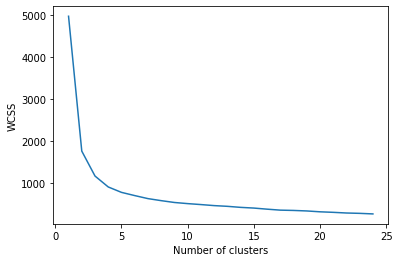

In [39]:
plt.plot(range(1, 25), wcss) #Plot of the code ran above
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

#b.
#We can see that the elbow starts to form a little before 5, therefore, 
#the actual solution and solution via the elbow method match.



In [43]:
kmeans5 = KMeans(n_clusters=5, init='k-means++', max_iter=300,
                   n_init=10, random_state=0)
k_means_clusters = kmeans5.fit_predict(categories)
k_means_clusters


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 3, 3,
       1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

c. 
For this dataset we do not need to use the elbow method because we already have the actual solution. However, it is important to visualize and confirm the solution at hand.

### **Task 5:**  Implement Hierarchical clustering using an appropriate linkage method 
**a:** Try different linkage criteria 

In [44]:
#import functions
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

agg_clusters_w = AgglomerativeClustering(n_clusters=5, linkage='ward')
ward_clusters = agg_clusters_w.fit_predict(categories)

#Using 'ward' linkage
ward_clusters


array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

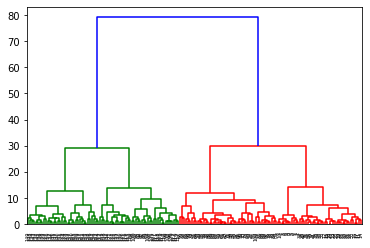

In [45]:
#Generating 'ward' linkage dendrogram
link_ward = linkage(categories, 'ward')


dendrogram(link_ward, orientation='top')
plt.show()

In [47]:
#Using 'single' linkage
agg_clusters_s = AgglomerativeClustering(n_clusters=5, linkage='single')
single_clusters = agg_clusters.fit_predict(categories)

single_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

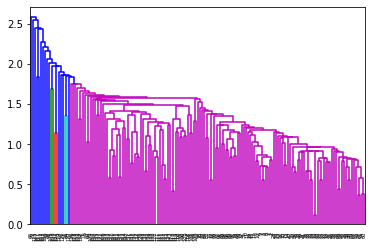

In [46]:
#Generating 'single' linkage dendrogram
link_single = linkage(categories, 'single')


dendrogram(link_single, orientation='top')
plt.show()

### **Task 6:** Plot the democracy index values

For aforementioned methods generate the clustering solution. The clustering solution simply groups the countries into different groups   
based on similarity. Once the solution is obtained, plot density plots of democracy index values considering all the countries within a group. 


In [54]:
df2 = df.assign(cluster_labels = k_means_clusters)

df2[['country', 'democracy_index', 'cluster_labels']]
#Putting the countries and their cluster labels, gathered from kMeans, togteher in a table 

,country,democracy_index,cluster_labels
0,Norway,9.87,0
1,Iceland,9.58,0
2,Sweden,9.39,0
3,New Zealand,9.26,0
4,Denmark,9.22,0
...,...,...,...
162,Chad,1.61,1
163,Central African Republic,1.52,1
164,Democratic Republic of the Congo,1.49,1
165,Syria,1.43,1


Text(0.5, 1.0, 'Density Plot of Democracy Index via KMeans')

<Figure size 900x600 with 0 Axes>

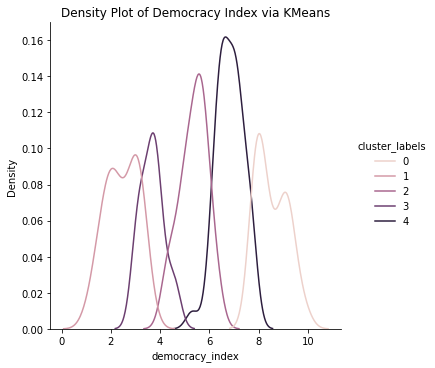

In [57]:
#Density PLot for the country's democracy index and their cluster labels gathered from kMeans
plt.figure(dpi=150)
sns.displot(data=df2, x='democracy_index', hue='cluster_labels',kind='kde')
plt.title('Density Plot of Democracy Index via KMeans')
